# COMP4220: Machine Learning, Spring 2022, Assignment 4


> ## **Please submit one pdf file for all questions.**


# 1. KMeans:

In [309]:
#importing the libraries --add any additional libraries you will need here
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [310]:
X_train = pd.read_csv("titanic.csv")

# removing the columns not of interest
X_train = X_train.drop(['PassengerId','Name','Ticket', 'Cabin','Embarked','Pclass','SibSp','Sex','Parch','Fare'], axis=1)

# removing rows of data with NaN 
X_train = X_train[X_train['Age'].notna()]

## a) Define X and y from the training data. Answer provided. Print X and y to see data.

In [311]:
X = X_train.drop(['Survived'], 1).astype(float)
y = X_train['Survived']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [312]:
print(X,y)

      Age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
..    ...
885  39.0
886  27.0
887  19.0
889  26.0
890  32.0

[714 rows x 1 columns] 0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


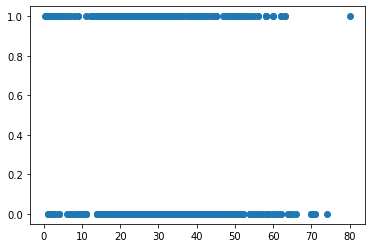

In [109]:
plt.scatter(X,y)

## b) Perform KMeans on X

In [110]:
kmeans1 = KMeans(n_clusters=1, random_state=1791).fit(X)
kmeans2 = KMeans(n_clusters=2, random_state=1791).fit(X)
kmeans3 = KMeans(n_clusters=3, random_state=1791).fit(X)
kmeans4 = KMeans(n_clusters=4, random_state=1791).fit(X)
kmeans5 = KMeans(n_clusters=5, random_state=1791).fit(X)
kmeans6 = KMeans(n_clusters=6, random_state=1791).fit(X)
kmeans7 = KMeans(n_clusters=7, random_state=1791).fit(X)
kmeans8 = KMeans(n_clusters=8, random_state=1791).fit(X)
kmeans9 = KMeans(n_clusters=9, random_state=1791).fit(X)
kmeans10 = KMeans(n_clusters=10, random_state=1791).fit(X)
km = [kmeans1,kmeans2,kmeans3,kmeans4,kmeans5,kmeans6,kmeans7,kmeans8,kmeans9,kmeans10]

In [111]:
km_scores = [model.score(X) for model in km[0:]]

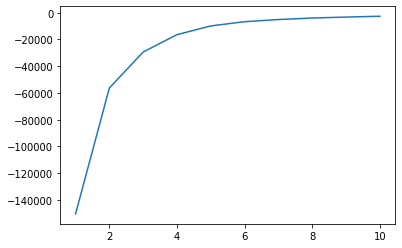

In [112]:
plt.plot([1,2,3,4,5,6,7,8,9,10],km_scores)

This implies 3 or 4 clusters

In [113]:
silhouette_scores = [silhouette_score(X,model.labels_)
                                  for model in km[1:]]

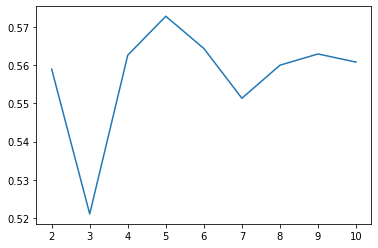

In [114]:
plt.plot([2,3,4,5,6,7,8,9,10],silhouette_scores)

This implies that both 4 and 5 are good choices, so since both methods had 4 as a option.  5 is the best, so let's go with 5

## c) Plot the prediction for X

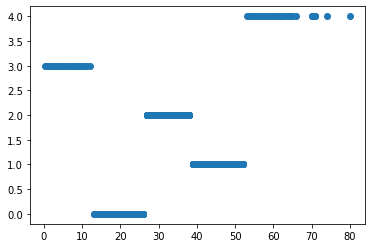

In [119]:
plt.scatter(X,kmeans5.labels_)

Now the decision comes to whether each cluster survives or does not survive, as we are looking to achieve a binary classification out of this

In [128]:
y[kmeans5.labels_==0].sum()/y[kmeans5.labels_==0].count()

0.36

In [129]:
y[kmeans5.labels_==1].sum()/y[kmeans5.labels_==1].count()

0.3888888888888889

In [130]:
y[kmeans5.labels_==2].sum()/y[kmeans5.labels_==2].count()

0.43119266055045874

In [131]:
y[kmeans5.labels_==3].sum()/y[kmeans5.labels_==3].count()

0.5797101449275363

In [132]:
y[kmeans5.labels_==4].sum()/y[kmeans5.labels_==4].count()

0.3333333333333333

Here it is plainly visable that cluster number 2 and 3 survived at a much higher rate than clusters 0,1,2. But only cluster 3 has a above 50% survival rate.  So we'll explore the accuracy using both only cluster 3 as survived and clusters 2 and 3 as survived

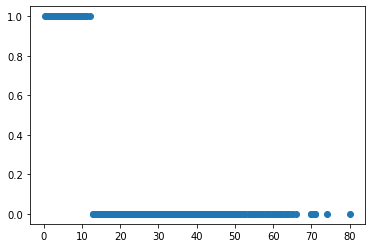

In [162]:
option1 = kmeans5.labels_
option1 = np.where(option1 ==3 , 1,0)
plt.scatter(X,option1)

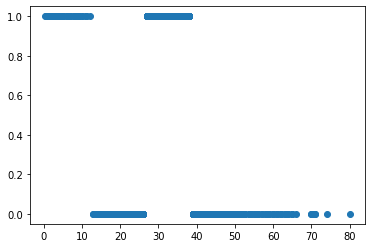

In [180]:
option2 = kmeans5.labels_
option2 = np.where(option2 ==1 , 0,option2)
option2 = np.where(option2 ==3 , 1,option2)
option2 = np.where(option2 ==2 , 1,option2)
option2 = np.where(option2 ==4, 0,option2)
plt.scatter(X,option2)

## d) Compute the accuracy 

In [307]:
from sklearn.metrics import accuracy_score

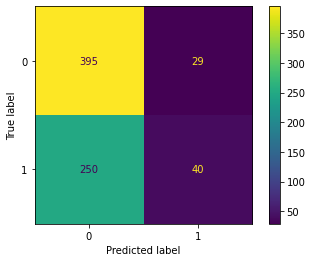

In [185]:
arr =confusion_matrix(y, option1)
ConfusionMatrixDisplay(arr).plot()

In [313]:
accuracy_score(y,option1)

0.6092436974789915

In [188]:
(395+40)/714 ## Total Accuracy

0.6092436974789915

In [197]:
29/(40+29) ## False Positive

0.42028985507246375

In [196]:
250/(250+395) ## False Negative

0.3875968992248062

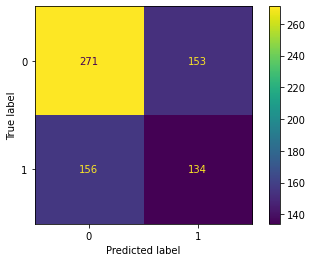

In [186]:
arr =confusion_matrix(y, option2)
ConfusionMatrixDisplay(arr).plot()

In [314]:
accuracy_score(y,option2)

0.5672268907563025

In [189]:
(271+134)/714  ## Total Accuracy

0.5672268907563025

In [198]:
153/(153+134)## False Positive

0.5331010452961672

In [199]:
156/(156+271) ##False Negative

0.36533957845433257

While the first option is more accurate (60%), the second model has a lower false negative chance

# 2. Classification using SVM

---



This is data collected from brain waves collection during a pain detection research project.

In [116]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [269]:
painData = pd.read_csv("pain.csv")

In [270]:
painData = painData.drop(['SubjectID','Index','Date', 'Time'], axis=1)
painData

,PainType,TP9,AF7,AF8,TP10,Right Axis,label
0,severe pain,68.847656,-73.242188,18.066406,27.832031,25.390625,3
1,severe pain,44.921875,-235.351562,36.621094,27.832031,-4.394531,3
2,severe pain,-11.230469,-81.054688,45.410156,29.296875,12.207031,3
3,severe pain,-2.929688,17.089844,33.203125,24.902344,44.433594,3
4,severe pain,10.253906,-58.105469,32.226562,14.648438,-0.976562,3
...,...,...,...,...,...,...,...
60191,moderate pain,33.203125,287.597656,45.898438,27.832031,25.878906,2
60192,moderate pain,24.414062,-20.507812,32.226562,21.484375,34.179688,2
60193,moderate pain,28.808594,-270.019531,24.902344,24.902344,34.667969,2
60194,moderate pain,37.109375,-190.917969,30.761719,31.250000,-36.132812,2


The label column is the target, and pain type is an explanation.

## a) Get X and y from painData above. X is TP9 and Right Axis. Y is label.

In [315]:
X = painData["TP9"]
y = painData["label"]

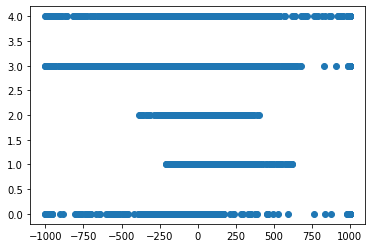

In [212]:
plt.scatter(X,y)

## a) Using a regularization parameter of c=1 and c=100, using a LinearSVC. 

In [215]:
scalar = StandardScaler()

In [214]:
svm_clf1 = LinearSVC(C=1,loss="hinge",random_state=20)
svm_clf2 = LinearSVC(C=100,loss="hinge",random_state=666)

## b) Scale the dataset using a pipeline

In [219]:
scaled_svm_clf1 = Pipeline([
                            ("scaler",scalar),
                            ("linear_svc",svm_clf1),
])

In [220]:
scaled_svm_clf2 = Pipeline([
                            ("scaler",scalar),
                            ("linear_svc",svm_clf2),
])

In [224]:
scaled_svm_clf1.fit(X.array.reshape(-1, 1),y)
scaled_svm_clf2.fit(X.array.reshape(-1, 1),y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=666))])

In [234]:
arr = y==scaled_svm_clf1.predict(X.array.reshape(-1,1))
arr.sum()/arr.count()

0.20464814937869627

In [235]:
arr = y==scaled_svm_clf2.predict(X.array.reshape(-1,1))
arr.sum()/arr.count()

0.2118579307595189

In [316]:
accuracy_score(y,scaled_svm_clf1.predict(X.array.reshape(-1,1)))

0.20464814937869627

In [317]:
accuracy_score(y,scaled_svm_clf2.predict(X.array.reshape(-1,1)))

0.2118579307595189

# 3. Decision Trees:
Using the same dataset above, meaning X and y

## a) Print the shape of X and y

In [226]:
print(X.shape)

(60196,)


In [227]:
print(y.shape)

(60196,)


## b) Train using a decision tree classifier

In [236]:
from sklearn.tree import DecisionTreeClassifier

In [240]:
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X.array.reshape(-1,1),y)

DecisionTreeClassifier(max_depth=2, random_state=42)

c) Visualize the dataset

In [259]:
import matplotlib as mt
from sklearn.tree import plot_tree

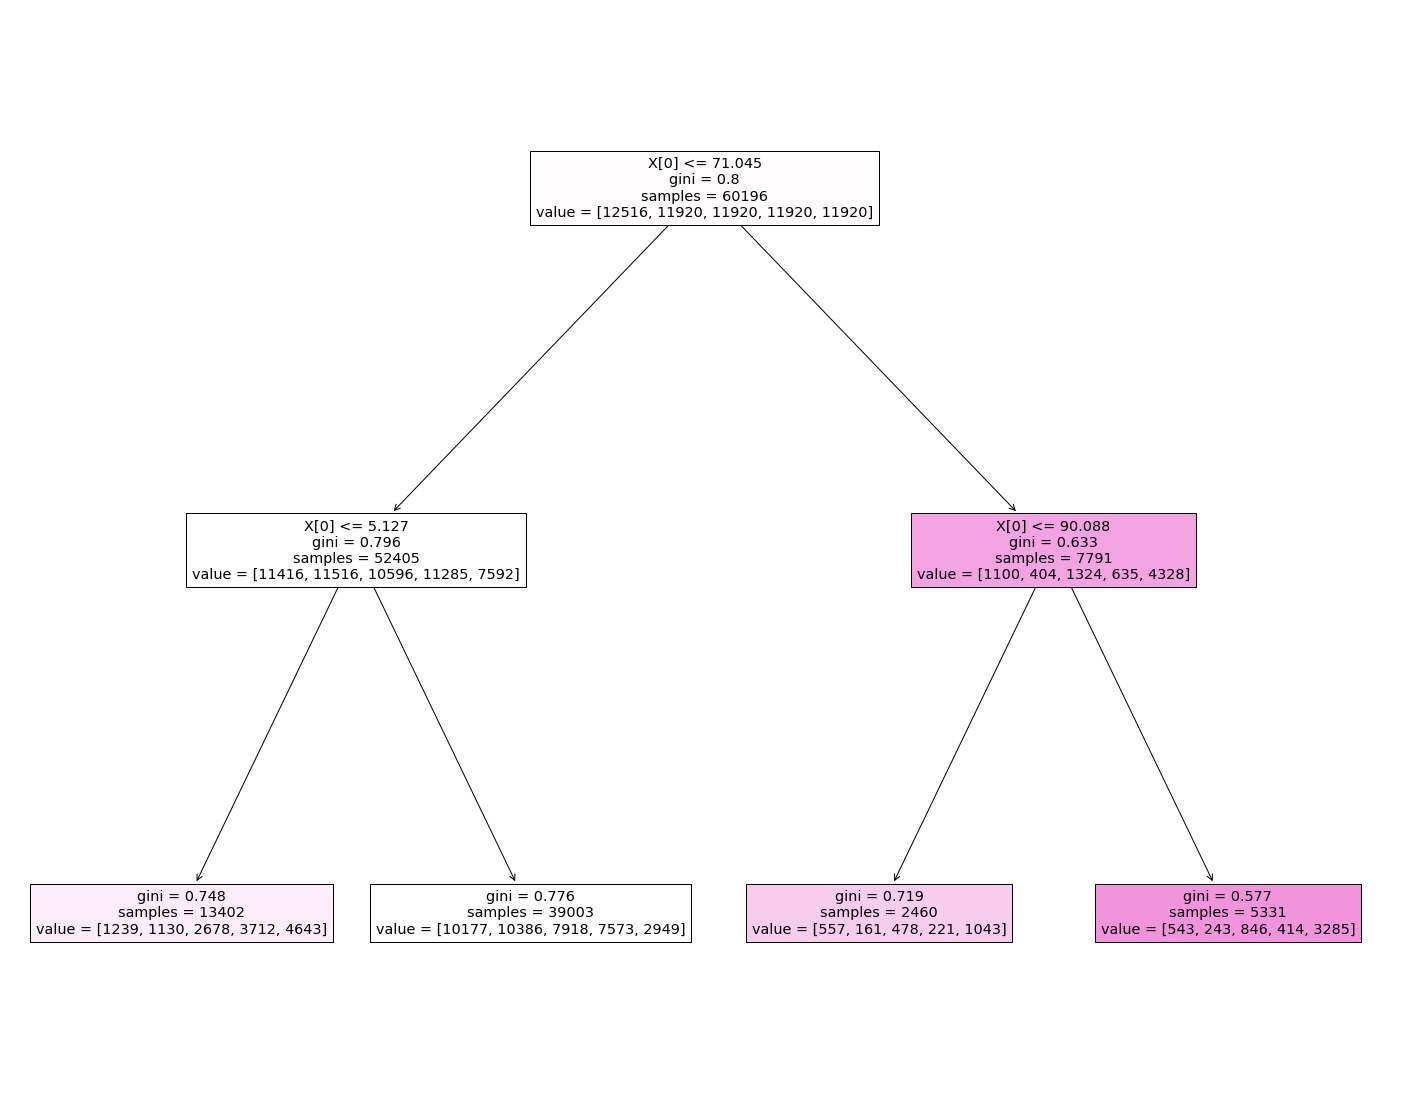

In [266]:
fig = plt.figure(figsize=(25,20)) 
_= plot_tree(tree_clf,filled=True)

# 4. Ensemble Classifier and Random forest
Run on pain.csv

## a) Run a voting classifier that includes logistic regression, random forest classifier and SVM

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [275]:
painData

,PainType,TP9,AF7,AF8,TP10,Right Axis,label
0,severe pain,68.847656,-73.242188,18.066406,27.832031,25.390625,3
1,severe pain,44.921875,-235.351562,36.621094,27.832031,-4.394531,3
2,severe pain,-11.230469,-81.054688,45.410156,29.296875,12.207031,3
3,severe pain,-2.929688,17.089844,33.203125,24.902344,44.433594,3
4,severe pain,10.253906,-58.105469,32.226562,14.648438,-0.976562,3
...,...,...,...,...,...,...,...
60191,moderate pain,33.203125,287.597656,45.898438,27.832031,25.878906,2
60192,moderate pain,24.414062,-20.507812,32.226562,21.484375,34.179688,2
60193,moderate pain,28.808594,-270.019531,24.902344,24.902344,34.667969,2
60194,moderate pain,37.109375,-190.917969,30.761719,31.250000,-36.132812,2


In [294]:
painData

,PainType,TP9,AF7,AF8,TP10,Right Axis,label
0,severe pain,68.847656,-73.242188,18.066406,27.832031,25.390625,3
1,severe pain,44.921875,-235.351562,36.621094,27.832031,-4.394531,3
2,severe pain,-11.230469,-81.054688,45.410156,29.296875,12.207031,3
3,severe pain,-2.929688,17.089844,33.203125,24.902344,44.433594,3
4,severe pain,10.253906,-58.105469,32.226562,14.648438,-0.976562,3
...,...,...,...,...,...,...,...
60191,moderate pain,33.203125,287.597656,45.898438,27.832031,25.878906,2
60192,moderate pain,24.414062,-20.507812,32.226562,21.484375,34.179688,2
60193,moderate pain,28.808594,-270.019531,24.902344,24.902344,34.667969,2
60194,moderate pain,37.109375,-190.917969,30.761719,31.250000,-36.132812,2


In [298]:
X = painData[["TP9","AF7","AF8","TP10","Right Axis"]]
y = painData["label"]

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=47)

In [303]:
log_clf = LogisticRegression(solver="lbfgs",random_state=29)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42069)
svm_clf = SVC(gamma="scale",random_state=53)

In [304]:
voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='hard')

In [306]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression 0.3763705229583361
RandomForestClassifier 0.6285467472921789
SVC 0.5235563824838859


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier 0.5418964715263472


## b) Print the accuracy scores 

LogisticRegression 0.3763705229583361

RandomForestClassifier 0.6285467472921789

SVC 0.5235563824838859

VotingClassifier 0.5418964715263472